In [2]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib

In [3]:
import tensorflow as tf

In [4]:
import os

In [5]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu,true)

In [7]:
len(gpus)

0

In [8]:
import cv2

In [9]:
import imghdr

In [10]:
data_dir='data'

In [11]:
image_ext=['jpeg','jpg','bmp','png']

In [12]:
os.listdir(data_dir)

['happy', 'sad']

In [15]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir,image_class)):
        image_path=os.path.join(data_dir,image_class,image)
        try:
            img=cv2.imread(image_path)
            tip=imghdr.what(image_path)
            if tip not in image_ext:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('problems with image {}'.format(image_path))

Image not in ext list data\happy\1rOrTgNQABn0P7dy3IrNDjg.jpeg
Image not in ext list data\happy\2560px-Happy_People.jpg
Image not in ext list data\happy\31418025-diverse-happy-people.jpg
Image not in ext list data\happy\427394C200000578-0-image-a-24_1500384481554.jpg
Image not in ext list data\happy\988689_Wallpaper2.jpg
Image not in ext list data\happy\guilherme-stecanella-375176-unsplash.jpg
Image not in ext list data\happy\o-HAPPY-facebook.jpg
Image not in ext list data\happy\portrait-young-father-carrying-his-260nw-736997836.jpg
Image not in ext list data\happy\sjnv_cnh7ugnaddm7so6sq.jpg
Image not in ext list data\sad\-sulking-from-regret-disappointment-feeling-sad-yellow-background_1258-58887.jpg
Image not in ext list data\sad\1200px-Sad-Mental-Illness.jpg
Image not in ext list data\sad\1800x1200_visual_guide_to_seasonal_affective_disorder_sad_slideshow.jpg
Image not in ext list data\sad\1s_bfK50lQFBR9t6CkYiJBA.jpeg
Image not in ext list data\sad\50740738-sad-people-s-portraits.jpg

In [17]:
tf.data.Dataset??

In [18]:
import numpy as np
from matplotlib import pyplot as plt

In [36]:
data=tf.keras.utils.image_dataset_from_directory('data')

Found 153 files belonging to 2 classes.


In [20]:
data_iterator=data.as_numpy_iterator()

In [24]:
batch=data_iterator.next()

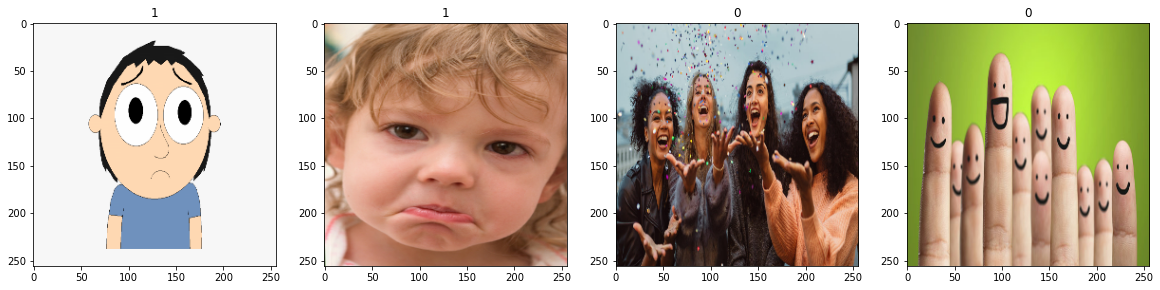

In [25]:
fig,ax=plt.subplots(ncols=4,figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [27]:
len(batch)

2

In [ ]:
#preprocessing data

In [28]:
scaled=batch[0]/255

In [29]:
scaled.max()

1.0

In [37]:
data=data.map(lambda x,y: (x/255,y))  # x: images  y:labels

In [38]:
scaled_iterator=data.as_numpy_iterator()

In [39]:
scaled_batch=scaled_iterator.next()

In [46]:
scaled_batch[0].max()

1.0

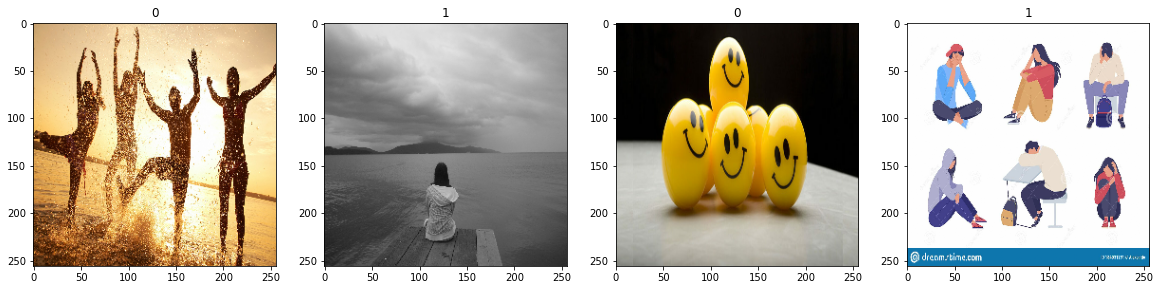

In [47]:
fig,ax=plt.subplots(ncols=4,figsize=(20,20))
for idx,img in enumerate(scaled_batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(scaled_batch[1][idx])

In [48]:
#split data

In [49]:
train_size=int(len(data)*.7)
val_size=int(len(data)*.2)+1
test_size=int(len(data)*.1)+1

In [50]:
train=data.take(train_size)
val=data.skip(train_size).take(val_size)
test=data.skip(train_size+val_size).take(test_size)

In [51]:
#Deep Learning

In [52]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout

In [53]:
model= Sequential()

In [55]:
model.add(Conv2D(16,(3,3),1,activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3),1,activation='relu'))
model.add(MaxPooling2D())
                 
model.add(Conv2D(16,(3,3),1,activation='relu'))
model.add(MaxPooling2D())
                 
model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [57]:
model.compile('adam',loss=tf.losses.BinaryCrossentropy(),metrics=['accuracy'])

In [58]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

In [59]:
#train

In [60]:
logdir='logs'

In [61]:
tensorflow_callback=tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [63]:
hist=model.fit(train,epochs=20,validation_data=val,callbacks=[tensorflow_callback])

Epoch 1/20
3/3 [==============================] - 19s 4s/step - loss: 1.0173 - accuracy: 0.6042 - val_loss: 0.8388 - val_accuracy: 0.3509
Epoch 2/20
3/3 [==============================] - 12s 3s/step - loss: 0.7462 - accuracy: 0.5000 - val_loss: 0.6284 - val_accuracy: 0.6140
Epoch 3/20
3/3 [==============================] - 13s 3s/step - loss: 0.6490 - accuracy: 0.6042 - val_loss: 0.6917 - val_accuracy: 0.5263
Epoch 4/20
3/3 [==============================] - 12s 3s/step - loss: 0.6299 - accuracy: 0.5729 - val_loss: 0.5927 - val_accuracy: 0.5965
Epoch 5/20
3/3 [==============================] - 12s 3s/step - loss: 0.5633 - accuracy: 0.6771 - val_loss: 0.5200 - val_accuracy: 0.6140
Epoch 6/20
3/3 [==============================] - 12s 3s/step - loss: 0.5112 - accuracy: 0.6250 - val_loss: 0.5146 - val_accuracy: 0.8246
Epoch 7/20
3/3 [==============================] - 12s 3s/step - loss: 0.4445 - accuracy: 0.8542 - val_loss: 0.3904 - val_accuracy: 0.8070
Epoch 8/20
3/3 [==================

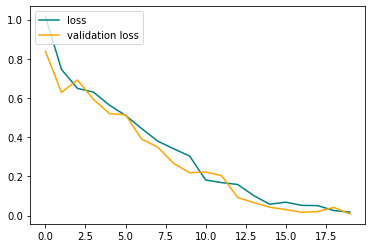

In [66]:
fig=plt.figure()
plt.plot(hist.history['loss'],color='teal',label='loss')
plt.plot(hist.history['val_loss'],color='orange',label='validation loss')
plt.legend(loc='upper left')
plt.show()

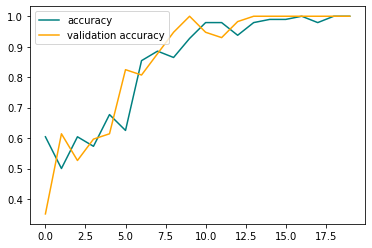

In [73]:
fig=plt.figure()
plt.plot(hist.history['accuracy'],color='teal',label='accuracy')
plt.plot(hist.history['val_accuracy'],color='orange',label='validation accuracy')
plt.legend(loc='upper left')
plt.show()

In [67]:
#evaluate performance

In [68]:
from tensorflow.keras.metrics import Precision,Recall,BinaryAccuracy

In [69]:
pre=Precision()
re=Recall()
acc=BinaryAccuracy()

In [70]:
for batch in test.as_numpy_iterator():
    X,y=batch
    yhat=model.predict(X)
    pre.update_state(y,yhat)
    re.update_state(y,yhat)
    acc.update_state(y,yhat)

In [72]:
print(pre.result().numpy(),re.result().numpy(),acc.result().numpy())

0.0 0.0 0.0


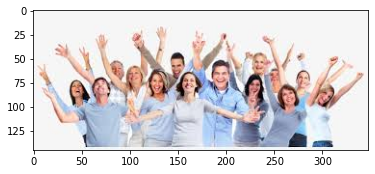

In [88]:
img=cv2.imread('Happy1.jpg')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

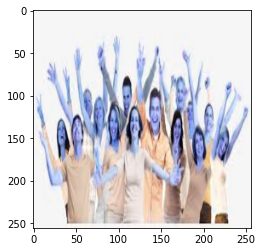

In [89]:
resize=tf.image.resize(img,(256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [90]:
yhat=model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 72ms/step


In [91]:
yhat

array([[0.00600483]], dtype=float32)

In [92]:
if yhat > 0.5:
    print('predicted image is sad')
else:
    print('predicted image is happy')

predicted image is happy


In [93]:
#save the model

In [94]:
from tensorflow.keras.models import load_model

In [95]:
model.save(os.path.join('models','imageclassifiernewversionlive.h5'))

In [96]:
new_model=load_model(os.path.join('models','imageclassifiernewversionlive.h5'))

In [98]:
yhat_new=new_model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 72ms/step


In [99]:
if yhat_new > 0.5:
    print('predicted image is sad')
else:
    print('predicted image is happy')

predicted image is happy
